<a href="https://colab.research.google.com/github/ridhimapm/CIS5930-Programming-Project-SVM-/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine algorithms involve making discrete predictions.
In our predictor algorithm, to start with a mathematical function that essentially gives a binary output 0 or 1.



In [18]:
#Loading the necessary libraries to implment Linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
        

35


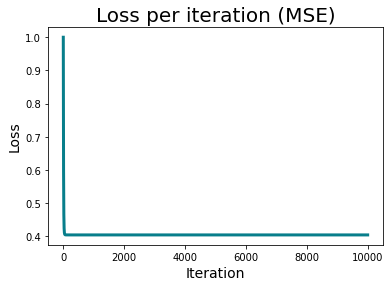

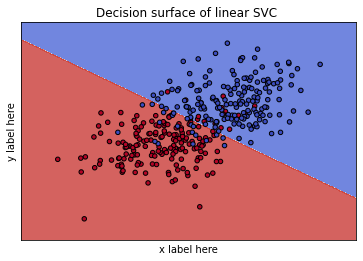

NameError: ignored

In [20]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []

    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        The Mean squared method is a private method,
        :Its used to evaluate loss at each iteration.
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)    

    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        #
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0 

        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d

    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        pred = np.dot(X, self.weights) + self.bias
        for i in range (len(pred)):
          if pred[i] < 0:
            pred[i] = -1
          else:
            pred[i] = 1
        return pred

def leave_one_out_error(X_test, y_test):
      lv = 0
      length = len(y_test)
      y_test_cpy = y_test.copy()
      for m in range(length):
        y_pred = clf.predict(X_test)
        y_test = np.delete(y_test, m)
        y_pred = np.delete(y_pred, m)
        n_correct = np.sum(y_pred != y_test)
        lv = lv + n_correct
        y_test = y_test_cpy.copy()
      print("leave-one-out cross validation error: ", lv/length)


mean1 = [-1,-1]
cov1 = [[1,0.25],[0.25,1]]
mean2 = [1,1]
cov2 = [[1,0.25],[0.25,1]]
X1 = np.random.multivariate_normal(mean1, cov1, 200)
y1 = np.ones(len(X1))              
random.seed(47405)  #Last 5 digits of the FSU Library number
X2 = np.random.multivariate_normal(mean2, cov2, 200)
y2 = np.ones(len(X2)) * -1

X1_train = X1[:180]
y1_train = y1[:180]
X2_train = X2[:180]
y2_train = y2[:180]
X_train = np.vstack((X1_train, X2_train))
y_train = np.hstack((y1_train, y2_train))


X1_test = X1[180:]
y1_test = y1[180:]
X2_test = X2[180:]
y2_test = y2[180:]
X_test = np.vstack((X1_test, X2_test))
y_test = np.hstack((y1_test, y2_test))

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
correct = np.sum(y_predict == y_test)
print(correct)

xs = np.arange(len(model.loss))
ys = model.loss


plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
#ax.legend()
plt.show()

leave_one_out_error(X_test, y_test)
mis_clf_err = (np.sum(y_predict != y_test)) / len(y_test)
print("Miss Classifier error: ", mis_clf_err)

This is Question 2 on the programming project.
-Implementing a Linear regression. 
-Creating a binary classifier by thresholding the output at 0.
- The data fro question 1(b) needs to be used in this question.
Running the Implementation on random data generated in the following way: For class A which corresponds to +1, generate 200 points, where according to a two dimensional gaussian with mean (-1,-1) and covariance matrix of (1,0.25) and (0.25,1)
For class B, that corresponds to -1, generate 200 points using same distribution. The mean in this case will be (1,1)
Seed the random number generator with The last 5 digits of FSU lib# : 47405 

To evaluate the performance of a model on a dataset, we need to measure how well the predictions made by the model match the observed data.
One commonly used method for doing this is known as leave-one-out cross-validation (LOOCV), which uses the following approach:
1. Split a dataset into a training set and a testing set, using all but one observation as part of the training set.

2. Build a model using only data from the training set.

3. Use the model to predict the response value of the one observation left out of the model and calculate the mean squared error (MSE).

4. Repeat this process n times. Calculate the test MSE to be the average of all of the test MSE’s.